# Preparation of calibration data

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ludwig10/code/envs/PyDynamic_tutorials-py38/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['kaiser']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [9]:
from meas_data_preprocessing import *
from hydrophone_data_preprocessing import *

## Read calibration data for selected measurement scenario

In [ ]:
infos, hyd_data = read_calib_data(meas_scenario = 13, do_plot = False)

In [4]:
# metadata for chosen measurement scenario
for key in infos.keys():
    print("%20s: %s" %(key,infos[key]))

                   i: 13
       hydrophonname: GAMPT MH44
     measurementtype: Pulse-Doppler-Mode 7 MHz
     measurementfile: MeasuredSignals/pD-Mode 7 MHz/pD7_MH44.DAT
           noisefile: MeasuredSignals/pD-Mode 7 MHz/pD7_MH44r.DAT
         hydfilename: HydrophonCalibrationData/MW_MH44ReIm.csv


In [5]:
# available measurement data
for key in hyd_data.keys():
    print("%10s: %s"%(key, type(hyd_data[key])))

      name: <class 'str'>
 frequency: <class 'numpy.ndarray'>
      real: <class 'numpy.ndarray'>
      imag: <class 'numpy.ndarray'>
   varreal: <class 'numpy.ndarray'>
   varimag: <class 'numpy.ndarray'>
       cov: <class 'numpy.ndarray'>


### Reduce frequency range

In [6]:
hyd_data = reduce_freq_range(hyd_data, fmin = 1e6, fmax = 100e6)

### Plot amplitude and phase data

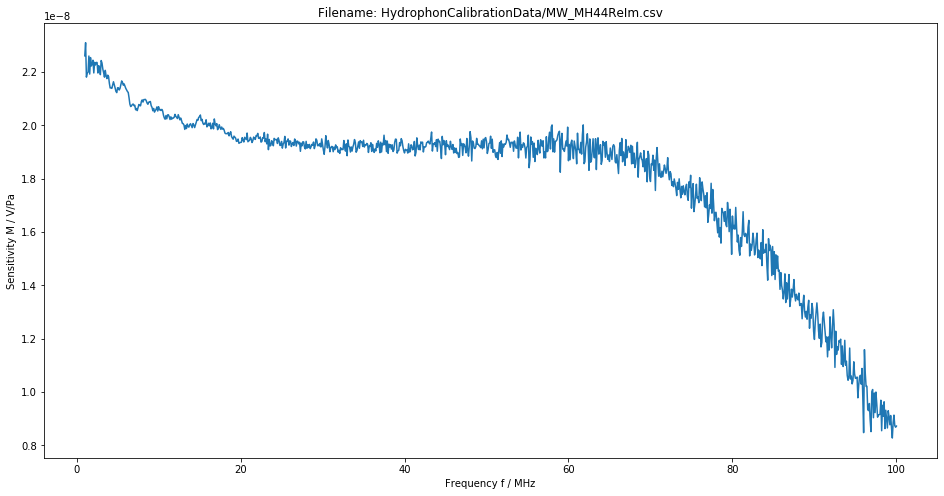

In [7]:
figure(figsize=(16,8))
plot(hyd_data["frequency"] / 1E6, np.sqrt(hyd_data["real"] ** 2 + hyd_data["imag"] ** 2))
xlabel("Frequency f / MHz")
ylabel("Sensitivity M / V/Pa")
title("Filename: {}".format(hyd_data["name"]));

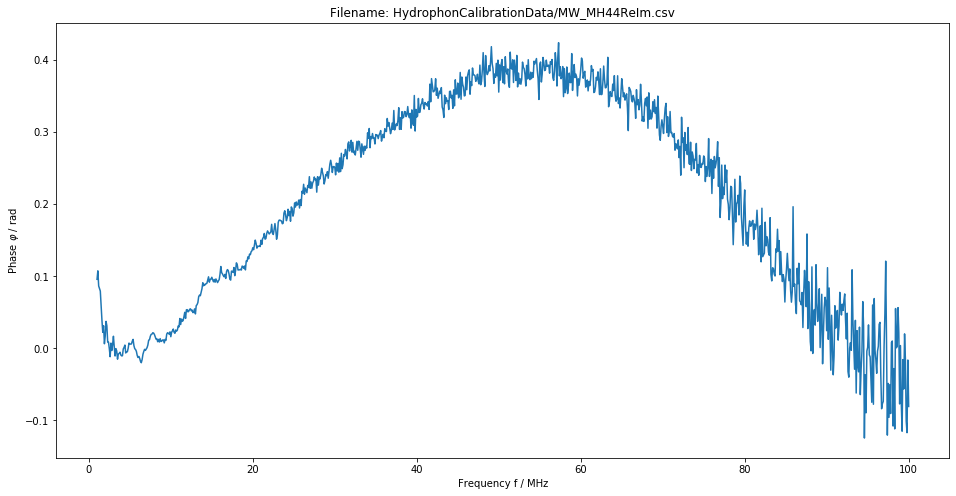

In [8]:
figure(figsize=(16,8))
plot(hyd_data["frequency"] / 1E6, np.arctan2(hyd_data["imag"], hyd_data["real"]))
xlabel("Frequency f / MHz")
ylabel(r"Phase $\varphi$ / rad")
title("Filename: {}".format(hyd_data["name"]));
